**Table of contents**<a id='toc0_'></a>    
- 1. [Imports:](#toc1_)    
- 2. [Model description](#toc2_)    
  - 2.1. [Analytical solution](#toc2_1_)    
  - 2.2. [Numerical solution](#toc2_2_)    
- 3. [Further analysis](#toc3_)    
  - 3.1. [Understanding the model - income vs substitution effects](#toc3_1_)    
  - 3.2. [Extension (I) - no income risk](#toc3_2_)    
  - 3.3. [Extension (II) - Stochastic income risk](#toc3_3_)    
  - 3.4. [Extension (III) - preference heterogeneity](#toc3_4_)    
- 4. [Conclusion](#toc4_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

From hand to... mouth or pocket?
===============================

**Description**

In this project, I build a simple two-period consumption-saving model with constant relative risk aversion to illustrate the dynamics in intertemporal optimization. I then extend the model to include income in the second period under a no risk and stochastic risk structure. Finally, I expand the model to include preference heterogeneity to illustrate how this alters the allocation of consumption over time.

# 1. <a id='toc1_'></a>[Imports:](#toc0_)

In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import utils

# 2. <a id='toc2_'></a>[Model description](#toc0_)

Consider the following simple two-period (subscripts denotes time period) consumer problem with no uncertainty:

$$
\begin{align}
U &= \max_{c_1, c_2} \frac{c_1^{1-\rho}}{1-\rho}+\beta \frac{c_2^{1-\rho}}{1-\rho} &\\
\text{s.t.} \\
c_2 &= (1+r)(m_1-c_1) &\\
c_1 &\in [0, m_1]
\end{align}
$$

- $m_1$ is the cash endowed to a agent in the model. This only happens in period 1.
- $c_i$ denotes the consumption period $i$.
- $r$ is the interest rate
- Utility parameters:
    - $\beta>0$ denotes the discount factor (degree of patience)
    - $\rho>0, \rho\neq1$ is the coefficient of risk aversion.

## 2.1. <a id='toc2_1_'></a>[Analytical solution](#toc0_)

Because we assume that agents have consumed everything by period 2, thus leaving nothing as bequests, we can directly plug in the expression for $c_2$ into our maximization problem. We can then characterize the solution by FOC w.r.t $c_1$: 

**FOC**:

\begin{align*}
c_1^{-\rho}-(1+r)\beta [(1+r)(m_1-c_1)]^{-\rho} &= 0 \leftrightarrow \\
c_1-((1+r)\beta)^{{-\frac{1}{\rho}}} (1+r)(m_1-c_1) &= 0 \leftrightarrow \\
c_1 &= \frac{(1+r)(m_1-c_1)}{(\beta(1+r))^{\frac{1}{\rho}}} \leftrightarrow \\

c_1(\beta(1+r))^{\frac{1}{\rho}}+(1+r)c_1 &= (1+r)m_1 \leftrightarrow \\

c_1^* &= \frac{(1+r)m_1}{(\beta(1+r))^{\frac{1}{\rho}}+1+r}
\end{align*}

Where by it follows that:

$$
c_2^* = (1+r)\left(m_1 - \frac{(1+r)m_1}{(\beta(1+r))^{\frac{1}{\rho}}+1+r}\right)
$$

## 2.2. <a id='toc2_2_'></a>[Numerical solution](#toc0_)

From line 3, we can analyze the solution numerically, if we treat it as root finding problem:

$$
c_1 - \frac{(1+r)(m_1-c_1)}{(\beta(1+r))^{\frac{1}{\rho}}} = 0
$$

To do this, I use the (Quasi)-Newton method. It works by...

Let's see the solution for the following parameter values:

- $\rho=5$
- $m_1=1$
- $r=0.05$
- $\beta = 0.95$

In [2]:
rho = 5
m1 = 1
r = 0.05
beta = 0.95

c1_star, c2_star = utils.solve_cons_crra(m1, r, beta, rho)

print(f'The numerical solution to the maximization problem is given by (c1, c2) = ({c1_star:.4f}, {c2_star:.4f}).')

The numerical solution to the maximization problem is given by (c1, c2) = (0.5123, 0.5121).


# 3. <a id='toc3_'></a>[Further analysis](#toc0_)
## 3.1. <a id='toc3_1_'></a>[Understanding the model - income vs substitution effects](#toc0_)

Let us know dive a little into the mechanics of this model. The common terms 'substitution' and 'income' effect gets thrown around a lot in economic maximization problems. They are easily mistaken for each other.

Consider a range of values for the interest rate $r$ for $\rho = 0.5, 0.99, 5$.

Text(0.5, 0.01, 'Interest rate, $r$')

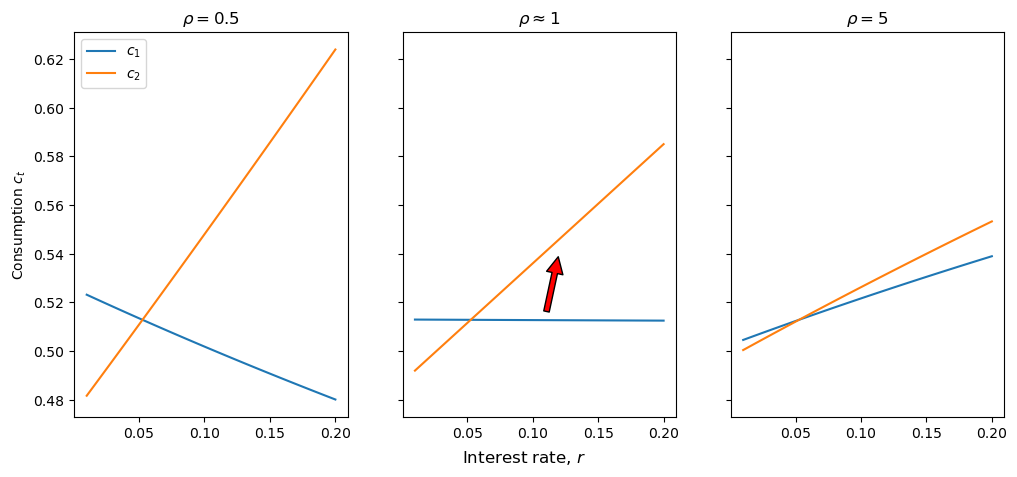

In [3]:
# Defining grids of different values of the interest rate
r_grid = np.linspace(0.01, 0.20, 100)
rho_low = 0.5
rho_one = 0.99
rho_high = 5

# Same parameters as above
m1 = 1
r = 0.05
beta = 0.95

# Defining grids consumption in period 1 & 2
c1_grids_low = np.empty(100)
c2_grids_low = np.empty(100)

c1_grids_one = np.empty(100)
c2_grids_one = np.empty(100)

c1_grids_high = np.empty(100)
c2_grids_high = np.empty(100)

# Solving numerically the optimal amount of consumption in period 1 & 2
for i, r in enumerate(r_grid):
    c1_grids_low[i], c2_grids_low[i] = utils.solve_cons_crra(m1, r, beta, rho_low)

    c1_grids_one[i], c2_grids_one[i] = utils.solve_cons_crra(m1, r, beta, rho_one)

    c1_grids_high[i], c2_grids_high[i] = utils.solve_cons_crra(m1, r, beta, rho_high)

# Plotting our results
fig, ax = plt.subplots(1, 3, figsize=(12,5), sharey=True)
ax[0].plot(r_grid, c1_grids_low, label='$c_1$')
ax[0].plot(r_grid, c2_grids_low, label='$c_2$')
ax[0].set_title(r'$\rho=0.5$')
ax[0].set_ylabel(r'Consumption $c_t$')
ax[0].legend()

ax[1].plot(r_grid, c1_grids_one, label='$c_1$')
ax[1].plot(r_grid, c2_grids_one, label='$c_2$')
ax[1].set_title(r'$\rho\approx 1$')

ax[2].plot(r_grid, c1_grids_high, label='$c_1$')
ax[2].plot(r_grid, c2_grids_high, label='$c_2$')
ax[2].set_title(r'$\rho = 5$')

# Adding an arrow to the middle plot 
arrow_start = (0.11, 0.515)
arrow_end = (0.12, 0.54)
ax[1].annotate('', xy=arrow_end, xytext=arrow_start, arrowprops=dict(facecolor='red', shrink=0.05))

fig.supxlabel(r'Interest rate, $r$')

It is clear from the figure that consumption in period 2 is positively dependent of the interest rate. An increase to the interest rate will increase the amount consumed in period 2 through increased returns on savings, *all things equal*.

However, it is more interesting what happens in period 1. Two things are happening: 1) higher interest rate means that consumption tomorrow becomes "cheaper" 2) higher interest rate also increases returns on endowments $m_1$ making consumption today "cheaper". 

From the figure, we can see how the coefficient of risk aversion $\rho$ determines to which degree an individual allocates his/her consumption in period 1. For $\rho<1$, the substitution effect dominates: The agent prefers to save and allocate his/her consumption to the next period. For $\rho>1$, the income effect dominates: The agent dislikes large variation in consumption between periods and thus allocates more consumption to period 1.

Finally, for $\rho \rightarrow 1$ the income and substitution effects directly cancel each other out. One can show that:

$$
\begin{aligned}
c_t = 
\begin{cases}
\frac{c_t^{1-\rho}}{1-\rho}, &\text{for } \rho > 0,~\rho \neq 1 \\
\ln(c_t), &\text{for } \rho = 1
\end{cases}
\end{aligned}
$$

From this, we can derive the expression for $c_1^*$ and find that this is independent of $r$.

Below I explore the parameter sensitivity w.r.t $\rho$.

Text(0.5, 0.01, 'Coefficient of risk aversion $\\rho$')

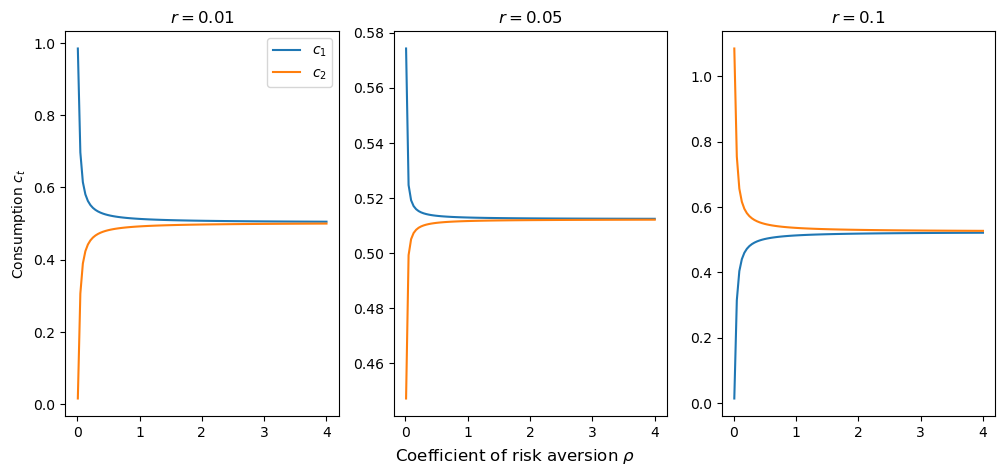

In [4]:
# Defining grids of possible rho values
rho_grid = np.linspace(0.01, 4, 100)
r_low = 0.01
r_med = 0.05
r_high = 0.1

# Defining grids consumption in period 1 & 2
c1_grids_low = np.empty(100)
c2_grids_low = np.empty(100)

c1_grids_med = np.empty(100)
c2_grids_med = np.empty(100)

c1_grids_high = np.empty(100)
c2_grids_high = np.empty(100)

# Solving numerically the optimal amount of consumption in period 1 & 2
for i, rho in enumerate(rho_grid):
    c1_grids_low[i], c2_grids_low[i] = utils.solve_cons_crra(m1, r_low, beta, rho)

    c1_grids_med[i], c2_grids_med[i] = utils.solve_cons_crra(m1, r_med, beta, rho)

    c1_grids_high[i], c2_grids_high[i] = utils.solve_cons_crra(m1, r_high, beta, rho)

fig, ax = plt.subplots(1, 3, figsize=(12,5))
ax[0].plot(rho_grid, c1_grids_low, label='$c_1$')
ax[0].plot(rho_grid, c2_grids_low, label='$c_2$')
ax[0].set_title(r'$r=0.01$')
ax[0].set_ylabel(r'Consumption $c_t$')
ax[0].legend()

ax[1].plot(rho_grid, c1_grids_med, label='$c_1$')
ax[1].plot(rho_grid, c2_grids_med, label='$c_2$')
ax[1].set_title(r'$r=0.05$')

ax[2].plot(rho_grid, c1_grids_high, label='$c_1$')
ax[2].plot(rho_grid, c2_grids_high, label='$c_2$')
ax[2].set_title(r'$r = 0.1$')
fig.supxlabel(r'Coefficient of risk aversion $\rho$')

This plot offers a different perspective on the above. For increasing $\rho$, an agent dislikes variation in consumption between periods. Graphically, this means that the two lines converges towards each other. At sufficiently high interest rates, one may allocate the majority of consumption in the next period regardless of risk aversion.

In the following section, I extend the model to include bequests, income risk and preference heterogeneity (). Specifically, I make three scenarios to illustrate the dynamics in intertemporal optimization:


|               | Scenario 1 | Scenario 2 | Scenario 3 |
|--             |:----------:|:----------:|:----------:|
| Income risk | No risk | Stochastic risk  | Stochastic risk |
| Preferences | Homogenous, with bequests | Homogenous, with bequests | Heterogenous, with bequests |

To do this, I rely on the dynamic programming content covered in week 17 of the course.

## 3.2. <a id='toc3_2_'></a>[Extension (I) - no income risk](#toc0_)

Consider the following two-period model where an agent faces no income risk in period 2 and leaves a bequest for any remaining assets. 

Period 2:

$$
\begin{align}
v_2(m_2) &= \max_{c_2} \frac{c_2^{1-\rho}}{1-\rho}+\gamma\frac{(m_2-c_2+\kappa)^{1-\rho}}{1-\rho} &\\
\text{s.t.} \\
c_2 &\in [0, m_2]
\end{align}
$$

Period 1:

$$
\begin{aligned}
v_1(m_1)&=\max_{c_1}\frac{c_{1}^{1-\rho}}{1-\rho}+\beta\mathbb{E}_{1}\left[v_2(m_2)\right]\\&\text{s.t.}&\\
m_2&= (1+r)(m_1-c_1)+y_2 \\
y_2 &= 1 \\
c_1&\in [0,m_1]
\end{aligned}
$$

Again, $m_1$ denotes endowments of cash-in-hand in period 1. $\gamma$ denotes the strength of the bequest motive. Agents sequentially optimize in expectation of their income in period 2. I denote this "scenario 1".

## 3.3. <a id='toc3_3_'></a>[Extension (II) - Stochastic income risk](#toc0_)

Above I made an assumption that agents perfectly know their income in period 2. I now modify this assumption to include stochastic income risk (denoted $\sigma$ in the model) in period 2. Again, agents sequentially optimize in expectation of their income in period 2. I denote this "scenario 2".

The maximzation problem in period 1 is now:

$$
\begin{aligned}
v_1(m_1)&=\max_{c_1}\frac{c_{1}^{1-\rho}}{1-\rho}+\beta\mathbb{E}_{1}\left[v_2(m_2)\right]\\&\text{s.t.}&\\
m_2&= \begin{cases}
(1+r)(m_1-c_1)*(1-\boldsymbol{\sigma}) & \text{with prob. }0.5\\
(1+r)(m_1-c_1)*(1+\boldsymbol{\sigma}) & \text{with prob. }0.5 
\end{cases}\\
c_1&\in [0,m_1]
\end{aligned}
$$

I consider a case where $\boldsymbol{\sigma}\stackrel{d}{\sim}\mathcal{U}(0.05,0.95)$. Because I draw from a uniform distribution, this is effectively a "perfectly" random situation, where there is a 50/50 chance of "winning" or "losing" big. Let us see how this plays out. In particular, what does the stochasticity mean for consumption in period 1?

The model is parameterized as follows:
- $\rho=4$
- $\kappa=1.5$
- $\beta = 0.95$
- $r=0.05$

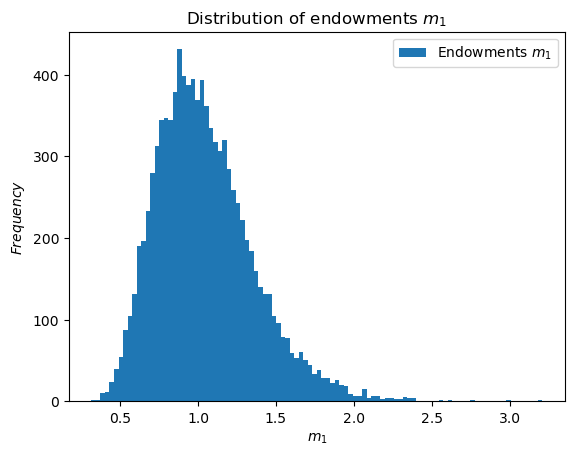

In [5]:
# First I draw 10_000 endowments in period 1 from log-normal distribution (which is always positive)

seed = np.random.seed(1337)
N = 10_000

m1_rand = np.random.lognormal(0,.3,size=N)

fig,ax = plt.subplots()
ax.hist(m1_rand, bins=100, label='Endowments $m_1$')
ax.set_xlabel('$m_1$')
ax.set_ylabel('$Frequency$')
ax.set_title('Distribution of endowments $m_1$')
ax.legend()

In [6]:
# I define a value function with no risk
def v1_func_no_risk(c1, m1, rho, beta, r,  v2_interp_func):

    y2=1
    m2 = (1+r)*(m1-c1)+y2

    exp_v2 = v2_interp_func([m2])[0]

    return utils.utility_crra(c1, rho) + beta*exp_v2

# Define model parameters
rho = 4
kappa = 1.5
gamma = 0.5
beta = 0.95
r = 0.05

From the endowments, I solve the model(s) and use interpolation to match cash-on-hand level with consumption in period 1 and 2. See `utils.py` how I specifically coded this.

In [7]:
# Based on above parameters, solve the model with no risk
m1_grid_no_risk, c1_grid_no_risk, m2_grid_no_risk, c2_grid_no_risk = utils.solvez_no_risk(rho=rho, kappa=kappa, gamma=gamma, beta=beta, r=r, v1=v1_func_no_risk)

# Consumption interpolator functions with no risk in period 1 & 2
c1_interp_no_risk = utils.interp(m1_grid_no_risk, c1_grid_no_risk)
c2_interp_no_risk = utils.interp(m2_grid_no_risk, c2_grid_no_risk)

# Compute consumption in period 1 based on interpolator function (no risk)
sim_c1_no_risk = c1_interp_no_risk(m1_rand)
sim_a1_no_risk = m1_rand-sim_c1_no_risk

#############################
# Introduce stochastic risk #
#############################

# Probability of ending in the "bad" case
p=0.5

# Lower and upper bound of risk outcome
sigma_low = 0.05
sigma_high = 0.95

# Solve model with stochastic risk
m1_grid_stoch_risk, c1_grid_stoch_risk, m2_grid_stoch_risk, c2_grid_stoch_risk = utils.solvez_stoch(rho=rho, kappa=kappa, gamma=gamma, beta=beta, sigma_low=sigma_low, sigma_high=sigma_high, r=r, p=p, v1=utils.v1_func_stoch)

# Consumption interpolator functions with stochastic risk in period 1 & 2
c1_interp_stoch_risk = utils.interp(m1_grid_stoch_risk, c1_grid_stoch_risk)
c2_interp_stoch_risk = utils.interp(m2_grid_stoch_risk, c2_grid_stoch_risk)

# Compute consumption in period 1 based on interpolator function (stochastic risk)
sim_c1_stoch_risk = c1_interp_stoch_risk(m1_rand)
sim_a1_stoch_risk = m1_rand-sim_c1_stoch_risk

Below, I illustrate the relation between endowments $m_1$ and consumption in period 1 separated by the different risk structures. 

(0.0, 4.0)

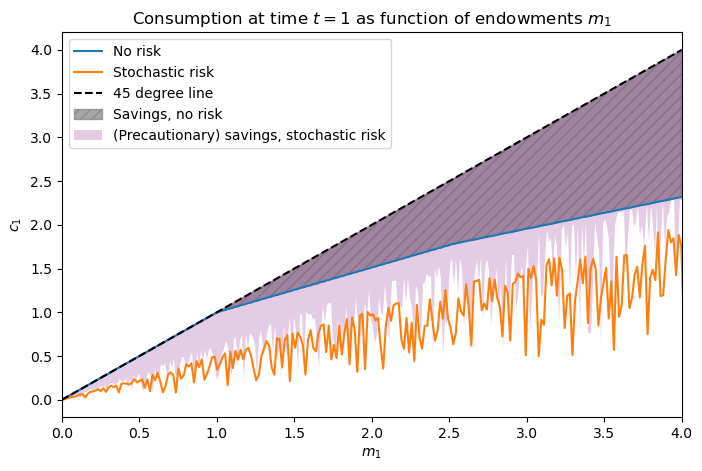

In [8]:
fig,ax = plt.subplots(figsize=(8,5))

# Make 45-degree line
y_45 = np.linspace(0, 4, 300)
x_45 = np.linspace(0, 4, 300)

ax.plot(m1_grid_no_risk, c1_grid_no_risk, label='No risk')
ax.plot(m1_grid_stoch_risk, c1_grid_stoch_risk, label='Stochastic risk')
ax.plot(y_45, x_45, label='45 degree line', linestyle='--', color='k')

# Fill between the 45-degree line and the "No risk" line
ax.fill_between(y_45, y_45, c1_grid_no_risk, color='gray', alpha=0.7, label='Savings, no risk', hatch='///')

# Fill between the 45-degree line and the "Stochastic risk" line
ax.fill_between(y_45, y_45, c1_grid_stoch_risk, fc='purple', alpha=0.2, label='(Precautionary) savings, stochastic risk', snap=True)

ax.legend()
ax.set_xlabel('$m_1$')
ax.set_ylabel('$c_1$')
ax.set_title('Consumption at time $t=1$ as function of endowments $m_1$')
ax.set_xlim(0,4)

This figure illustrate how an agent, who faces no income risk, lives "hand-to-mouth" (consumes everything) for endowments $m_1\lessapprox1$. Graphically, we can see that by the placement of the blue line: it is perfectly on the 45-degree line for $m_1\lessapprox 1 $.

Interestingly, at no point does an agent live hand-to-mouth when introduced to stochastic income risk. This makes intuitive sense. In anticipation of income risk, agents will start to save and do so more aggresively for increasing amounts of endowments $m_1$ (illustrated by the purple shaded area). This is because of the specific risk structure - they may lose "big".

*Note*: The `ax.fill_between()` method seem not to completely color the area between the 45-degree and the orange line. Imagine that this is so.

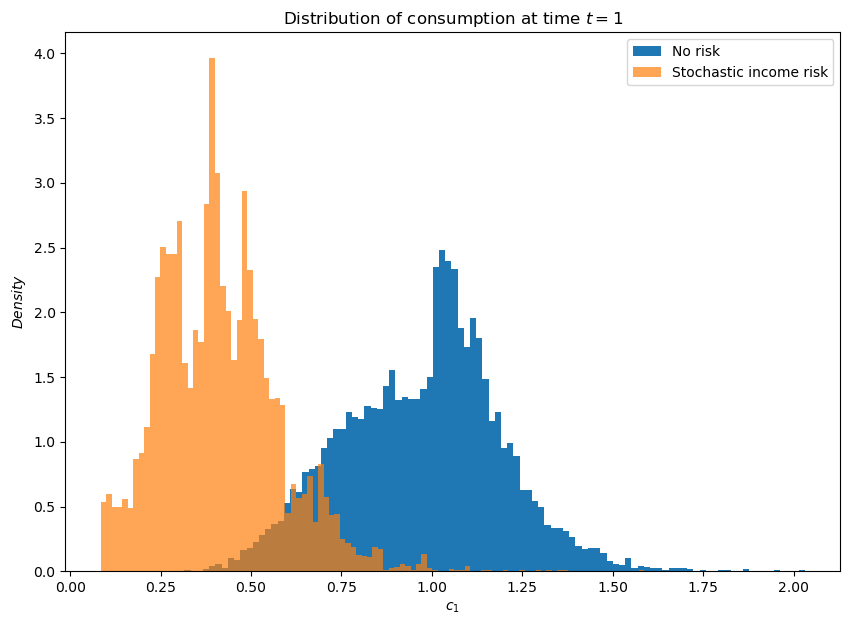

In [9]:
# Lets how consumption in period 1 is distributed over the different risk structures
fig,ax = plt.subplots(figsize=(10,7))
ax.hist(sim_c1_no_risk, density=True, bins=100, label='No risk')
ax.hist(sim_c1_stoch_risk, density=True, bins=100, label='Stochastic income risk', alpha=0.7)
ax.set_xlabel('$c_1$')
ax.set_ylabel('$Density$')
ax.set_title('Distribution of consumption at time $t=1$')
ax.legend()

From here we see that the precautionary savings motive really shine through: The density of consumption in period 1 for agents facing stochastic income risk is concentrated around lower values of $c_1$.

## 3.4. <a id='toc3_4_'></a>[Extension (III) - preference heterogeneity](#toc0_)

I now turn to "scenario 3". It is effectively combining scenario 1 and 2 by introducing preference heterogeneity for agents of type $i=A,B$. Type $A$ comes from a "rich" and type "B" from a poor family, who differ in the amount endowed in period 1 $m_1$. The maximization problem now reads:

Period 2:

$$
\begin{align}
v_2(m_2) &= \max_{c_2} \frac{c_2^{1-\rho}}{1-\rho}+\boldsymbol{\gamma}_i \frac{(m_2-c_2+\kappa)^{1-\rho}}{1-\rho} &\\
\text{s.t.} \\
c_2 &\in [0, m_2]
\end{align}
$$

Period 1:

$$
\begin{aligned}
v_1(m_1)&=\max_{c_1}\frac{c_{1}^{1-\rho}}{1-\rho}+\beta\mathbb{E}_{1}\left[v_2(m_2)\right]\\&\text{s.t.}&\\
m_2&= \begin{cases}
(1+r)(m_1-c_1)*(1-\boldsymbol{\sigma_i}) & \text{with prob. }\boldsymbol{p}_i\\
(1+r)(m_1-c_1)*(1+\boldsymbol{\sigma_i}) & \text{with prob. }1-\boldsymbol{p}_i 
\end{cases}\\
c_1&\in [0,m_1]
\end{aligned}
$$

Where:

$$
\begin{aligned}
    \boldsymbol{\sigma}_i&= 
\begin{cases}
\sigma_A\stackrel{d}{\sim}\mathcal{U}(0.05,0.95) & \text{for type }A\\
\sigma_B\stackrel{d}{\sim}\mathcal{U}(0.1,0.5) & \text{for type }B
\end{cases}\\
    \boldsymbol{\gamma}_i&=
\begin{cases}
\gamma_A&=5 & \text{for type }A\\
\gamma_B&=0.1 & \text{for type }B
\end{cases}\\
    \boldsymbol{p}_i&=
\begin{cases}
    p_A &= 0.3 & \text{for type }A\\
    p_B &= 0.5 & \text{for type }B
\end{cases}
\end{aligned}
$$
 
To summarize type A and type B differ by this:
- The rich type A can win/lose "big" - but there is relatively small risk of this.
- The poor type B cannot lose as much - but the risk of ending in the low case is relatively large.
- The rich type A is considerably more benevolent than the poor type B (parameterized by $\gamma$). 

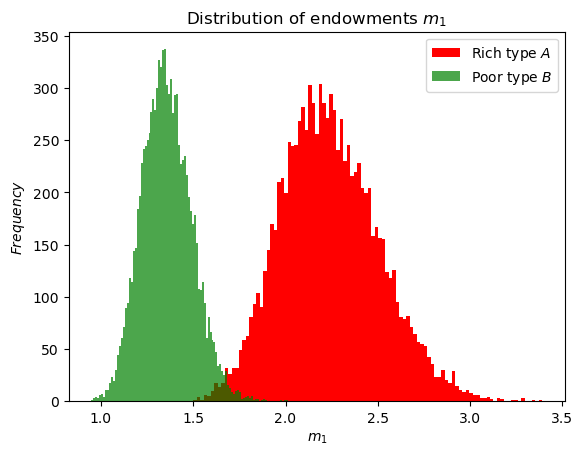

In [10]:
# Draw 10_000 endowments for the rich and poor
m1_rand_rich = np.random.lognormal(.8,.12,size=N)
m1_rand_poor = np.random.lognormal(0.3,0.1,size=N)

fig,ax = plt.subplots()
ax.hist(m1_rand_rich, bins=100, label=r'Rich type $A$', color='r')
ax.hist(m1_rand_poor, bins=100, label=r'Poor type $B$', color='g', alpha=0.7)
ax.set_xlabel('$m_1$')
ax.set_ylabel('$Frequency$')
ax.set_title('Distribution of endowments $m_1$')
ax.legend()

In [11]:
rho = 4
kappa = 1.5
gamma_rich = 5
beta=0.94
r = 0.05
delta = 0.5
p=0.3

sigma_low = 0.05
sigma_high = 0.95

m1_grid_rich, c1_grid_rich, m2_grid_rich, c2_grid_rich = utils.solvez_stoch(rho=rho, kappa=kappa, gamma=gamma_rich, beta=beta, sigma_low=sigma_low, sigma_high=sigma_high, r=r, p=p, v1=utils.v1_func_stoch)

c1_interp_rich = utils.interp(m1_grid_rich, c1_grid_rich)
c2_interp_rich = utils.interp(m2_grid_rich, c2_grid_rich)

# period 1
sim_c1_rich = c1_interp_rich(m1_rand_rich)
sim_a1_rich = m1_rand_rich-sim_c1_rich

# period 2
sim_m2_rich = (1+r)*sim_a1_rich

# period 2
sim_c2_rich = c2_interp_rich(sim_m2_rich)

sigma_low = 0.1
sigma_high = 0.5
gamma_poor = 0.1
p=0.5

m1_grid_poor, c1_grid_poor, m2_grid_poor, c2_grid_poor = utils.solvez_stoch(rho=rho, kappa=kappa, gamma=gamma_poor, beta=beta, sigma_low=sigma_low, sigma_high=sigma_high, r=r, p=p, v1=utils.v1_func_stoch)

c1_interp_poor = utils.interp(m1_grid_poor, c1_grid_poor)
c2_interp_poor = utils.interp(m2_grid_poor, c2_grid_poor)

# period 1
sim_c1_poor = c1_interp_poor(m1_rand_poor)
sim_a1_poor = m1_rand_poor-sim_c1_poor

# period 2
sim_m2_poor = (1+r)*sim_a1_poor

# period 2
sim_c2_poor = c2_interp_poor(sim_m2_poor)

# share
share_rich=sim_c1_rich/(sim_c1_rich+sim_c2_rich)
share_poor=sim_c1_poor/(sim_c1_poor+sim_c2_poor)

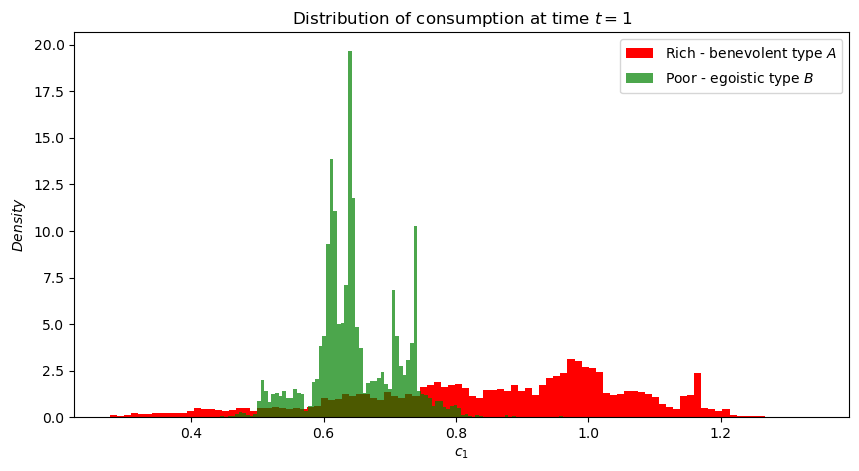

In [12]:
# Lets plot our results
fig,ax = plt.subplots(figsize=(10,5))
ax.hist(sim_c1_rich, density=True, bins=100, color='r', label=r'Rich - benevolent type $A$')
ax.hist(sim_c1_poor, density=True, bins=100, color='g', label=r'Poor - egoistic type $B$', alpha=0.7)
ax.set_xlabel('$c_1$')
ax.set_ylabel('$Density$')
ax.set_title('Distribution of consumption at time $t=1$')
ax.legend()

Interesingly, the plot shows that the consumption of the rich "benevolent" type $A$ in period 1 is much more dispersed than the poor "egoistic" type $B$. This makes intuitive sense. It may be that the rich type $A$ faces higher potential risk, but the probability of ending up with a "low" income in period 2 is relatively small. Combined with a relatively strong desire to leave a bequest, he/she may ease up on consumption in period 1. This is in constrast to the more "egoistic" type $B$ who faces a less pronounced risk, but the probability of ending up with a "low" income in period 2 is relatively big. In other words, living hand-to-mouth seem more likely for the poor in this model specification.

# 4. <a id='toc4_'></a>[Conclusion](#toc0_)

In this project, I have showed how dynamics under intertemporal optimization may be illustrated with numerical solutions. Specifically, I illustrated the how a stochastic risk structure of future income will lead to precautionary saving. Further, I showed how a benevolent rich agent facing a relatively modest stochastic risk structure may lead to disperse his/her consumption considerable more than a egoistic poor agent.